In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("wine.data", header=None)

In [6]:
data.columns = ["Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium",
                "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins",
                "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]

In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
data.head(5)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
# Split data into features (X) and target variable (y)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
pca = PCA()
pca_data = pca.fit_transform(X_scaled)

In [11]:
explained_variance = pca.explained_variance_ratio_

In [13]:
import numpy as np
explained_threshold = 0.9
num_components = np.where(np.cumsum(explained_variance) >= explained_threshold)[0][0] + 1

In [14]:
# Reduce data to the chosen number of components
pca = PCA(n_components=num_components)
pca_data_reduced = pca.fit_transform(X_scaled)

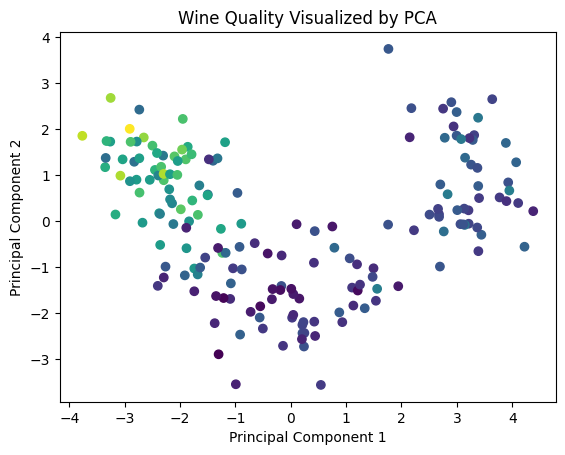

In [15]:
# Visualize data using the first two principal components
plt.scatter(pca_data_reduced[:, 0], pca_data_reduced[:, 1], c=y)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Wine Quality Visualized by PCA")
plt.show()

In [16]:
# Perform K-Means clustering with 3 clusters (adjust number of clusters as needed)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(pca_data_reduced)

KMeans(n_clusters=3, random_state=42)

In [17]:
print("Explained Variance Ratio:", explained_variance[:num_components])
print("Cluster labels:", kmeans.labels_)

Explained Variance Ratio: [0.3996507  0.16770494 0.10920338 0.0683296  0.06528109 0.05148865
 0.04248671]
Cluster labels: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
